In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# Load Datasets

sklearn.datasets.base.Bunch

{'DESCR': str,
 'data': numpy.ndarray,
 'feature_names': list,
 'target': numpy.ndarray,
 'target_names': numpy.ndarray}

(150, 4)

(1797, 64)

(1797, 8, 8)

(442, 10)

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

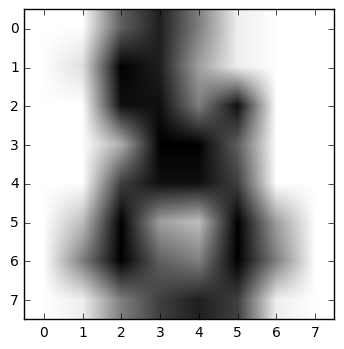

In [2]:
from sklearn import datasets

def inspect(obj):
    display(type(obj))
    display(dict([(m, type(getattr(obj, m))) for m in dir(obj)]))

iris = datasets.load_iris()
digits = datasets.load_digits()
diabetes = datasets.load_diabetes()   #high dimensionality

inspect(iris)
display(iris.data.shape)
display(digits.data.shape)
display(digits.images.shape)
display(diabetes.data.shape)

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 

display(np.unique(iris.target_names))


# Basic Classification

In [3]:
clf = svm.SVC()
X, y = iris.data, iris.target
display(clf.fit(X[:-1], y[:-1]))
display(clf.predict(iris.data[-1:]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([2])

# k-Nearest neighbors classifier

In [4]:
iris_X = iris.data
iris_y = iris.target

# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

# compare predicted target to actual target
display(knn.predict(iris_X_test))
display(iris_y_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [5]:
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

#display (np.c_.__doc__)
np.c_[ .5, 1].T
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

# coefficients
display(regr.coef_)
# The mean square error is high
display (np.mean((regr.predict(diabetes_X_test)-diabetes_y_test) **2))
# variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship between X and y.
display(regr.score(diabetes_X_test, diabetes_y_test) )



array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

2004.5676026898225

0.58507530226905713

### Shrinkage
If there are few data points per dimension, noise in the observations induces high variance:


array([[ 0.5],
       [ 1. ]])

array([[0],
       [2]])

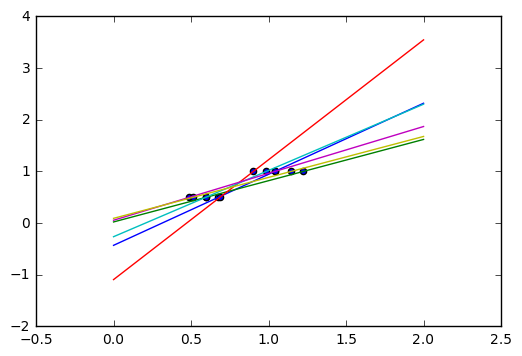

In [62]:
X = np.c_[ .5, 1].T
display(X)
y = [.5, 1]
test = np.c_[ 0, 2].T
display(test)

# plt.figure() # not necessary in jupyter
np.random.seed(0)
def plot_regression(regr):
    for _ in range(6):
        noise = .1*np.random.normal(size=(2, 1))
        this_X = noise + X
        regr.fit(this_X, y)
        plt.plot(test, regr.predict(test)) 
        plt.scatter(this_X, y) #s=size of points. default = 20
        
regr = linear_model.LinearRegression()
plot_regression(regr)

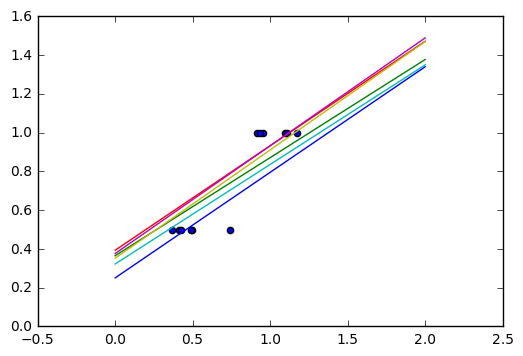

In [75]:
regr = linear_model.Ridge(alpha=.1)
plot_regression(regr)

### Regularization
tradeoff: **bias** (**alpha** parameter) is inversely related to **variance**. choose alpha to minimize error

In [94]:
regr = linear_model.Ridge()
def best_alpha(regr):
    alphas = np.logspace(-4, -1, 6)
    display("alphas:", alphas)
    scores =[regr.set_params(alpha=alpha)
       .fit(diabetes_X_train, diabetes_y_train,)
       .score(diabetes_X_test, diabetes_y_test) for alpha in alphas]
    display ("scores:", scores)
    best_alpha = alphas[scores.index(max(scores))]
    display("best alpha:", best_alpha)
    regr.alpha = best_alpha
    regr.fit(diabetes_X_train, diabetes_y_train)
    return regr

* **Shrinkage (Ridge regression)**: for high-D data, **shrink** regression coefficients **towards** zero: any two randomly chosen set of observations are likely to be uncorrelated.

In [95]:
regr = best_alpha(linear_model.Ridge())
display ("ridge coefficients:", regr.coef_)

'alphas:'

array([ 0.0001    ,  0.00039811,  0.00158489,  0.00630957,  0.02511886,
        0.1       ])

'scores:'

[0.58511106838835314,
 0.58520730154446765,
 0.58546775406984919,
 0.58555120365039159,
 0.58307170855541612,
 0.570589994372801]

'best alpha:'

0.0063095734448019303

'ridge coefficients:'

array([   2.53727   , -233.98779763,  512.31671285,  325.06074367,
       -479.36186472,  228.08434807,  -45.14638083,  143.85664441,
        614.93833663,   78.94457075])

* **Sparsity (Lasso)**: select only informative features and set others to 0

In [96]:
regr = best_alpha(linear_model.Lasso())
display ("lasso coefficients:", regr.coef_)

'alphas:'

array([ 0.0001    ,  0.00039811,  0.00158489,  0.00630957,  0.02511886,
        0.1       ])

'scores:'

[0.58511910691622271,
 0.58524713649060489,
 0.58571895391793527,
 0.58730094854527415,
 0.58876224183092607,
 0.5828450029681681]

'best alpha:'

0.025118864315095794

'lasso coefficients:'

array([   0.        , -212.43764548,  517.19478111,  313.77959962,
       -160.8303982 ,   -0.        , -187.19554705,   69.38229038,
        508.66011217,   71.84239008])